Construindo um grafo automaticamente
====================================



## Introdução



Neste notebook nós vamos dar o primeiro passo para construir nossa rede neural artificial. Neste primeiro passo, nós vamos criar uma classe que gera automaticamente o nosso `grafo computacional`. O grafo computacional é o grafo que representa todas as operações matemáticas que ocorreram ao se computar um certo valor $y$. O grafo computacional é um passo necessário pois será baseado nele que iremos computar os gradientes locais necessários para realizar o `backpropagation`.



## Importações



In [1]:
from funcoes import plota_grafo

## Código e discussão



### Primeiros passos



A base de tudo será uma classe chamada `Valor`. Vamos começar pelo básico!



In [2]:
class Valor:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Valor(data={self.data})"

Vamos testar nossa classe!



In [3]:
x1 = Valor(60)
print(x1)
print(x1.data)

Valor(data=60)
60


### Os dunders `__add__` e `__mul__`



Observe que não conseguimos adicionar nem multiplicar objetos criados com a classe `Valor`.



In [4]:
a = Valor(10)
b = Valor(5)

In [7]:
# print(a + b)

In [8]:
# print(a * b)

Ué&#x2026; porque não conseguimos? Não conseguimos pois o Python (ainda) não é vidente. Ele lá vai saber como adicionar ou multiplicar algo que você criou? Pra você parece óbvio que valores podem ser adicionados ou multiplicados, mas para o Python ele nem sabe o que significa a palavra `Valor`&#x2026;

Como sempre, temos que contar para o programa o que queremos que aconteça quando usarmos os operadores `+` e `*`. Quem faz isso são os dunders `__add__` e `__mul__`.



In [9]:
class Valor:
    def __init__(self, data):
        self.data = data

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        saida = Valor(self.data + outro_valor.data)
        return saida

    def __mul__(self, outro_valor):
        saida = Valor(self.data * outro_valor.data)
        return saida

Vamos testar!



In [10]:
a = Valor(10)
b = Valor(5)

print (a + b)
print(a * b)

Valor(data=15)
Valor(data=50)


### Registrando os progenitores



Nosso objetivo é construir um grafo computacional. Em um grafo computacional, um certo vértice pode ter um ou mais vértices progenitores (são seus pais/mães). Nós não podemos perder essa informação quando formos construir um grafo, então precisamos incluir essa informação na nossa classe.



In [11]:
class Valor:
    def __init__(self, data, progenitor=()):
        self.data = data
        self.progenitor = progenitor

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        saida = Valor(data, progenitor)
        return saida

    def __mul__(self, outro_valor):
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        saida = Valor(data, progenitor)
        return saida

Vamos testar!



In [12]:
a = Valor(10)
b = Valor(5)

print(a.data)
print(a.progenitor)

c = a + b
d = c * a

print(c)
print(a)
print(d.progenitor)

10
()
Valor(data=15)
Valor(data=10)
(Valor(data=15), Valor(data=10))


### Registrando o operador mãe



Em um grafo computacional, um vértice pode ter um operador mãe. O operador mãe é o operador que foi usado para gerar o vértice.



In [13]:
class Valor:
    def __init__(self, data, progenitor=(), operador_mae=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "+"
        saida = Valor(data, progenitor, operador_mae)
        return saida

    def __mul__(self, outro_valor):
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "*"
        saida = Valor(data, progenitor, operador_mae)
        return saida

Vamos testar!



In [14]:
a = Valor(10)
b = Valor(5)

c = a + b
d = c * a

print(c)
print(c.progenitor)
print(c.operador_mae)

Valor(data=15)
(Valor(data=10), Valor(data=5))
+


### Plotando o primeiro grafo



Vamos plotar nosso primeiro grafo!



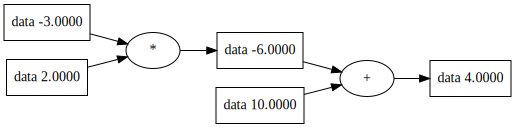

In [15]:
a = Valor(2)
b = Valor(-3)
c = Valor(10)

d = a * b
e = d + c

plota_grafo(e)

### Registrando o rótulo



Nosso grafo seria mais legível se tivéssemos rótulos indicando o que é cada vértice. Vamos incluir essa informação na nossa classe.



In [16]:
class Valor:
    def __init__(self, data, progenitor=(), operador_mae="", rotulo=""):
        self.data = data
        self.progenitor = progenitor
        self.operador_mae = operador_mae
        self.rotulo = rotulo

    def __repr__(self):
        return f"Valor(data={self.data})"

    def __add__(self, outro_valor):
        data = self.data + outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "+"
        saida = Valor(data, progenitor, operador_mae)
        return saida

    def __mul__(self, outro_valor):
        data = self.data * outro_valor.data
        progenitor = (self, outro_valor)
        operador_mae = "*"
        saida = Valor(data, progenitor, operador_mae)
        return saida

Vamos testar!



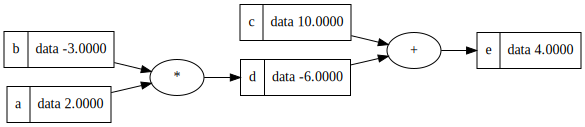

In [17]:
a = Valor(2, rotulo="a")
b = Valor(-3, rotulo="b")
c = Valor(10, rotulo="c")

d = a * b
e = d + c

d.rotulo = "d"
e.rotulo = "e"

plota_grafo(e)

### Refazendo o grafo que fizemos na aula anterior



Na aula anterior nós fizemos um grafo computacional para aprender como funciona o backpropagation. Vamos refazer ele aqui!



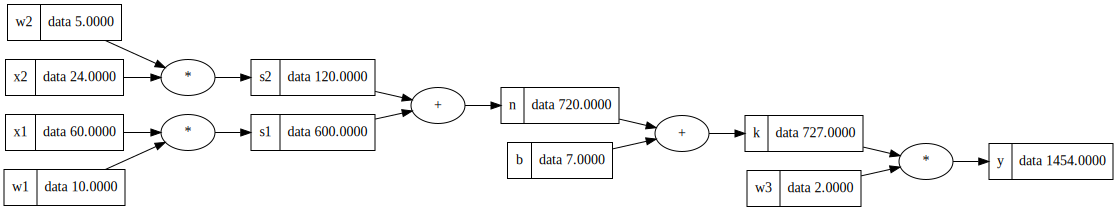

In [18]:
x1 = Valor(60, rotulo='x1')
x2 = Valor(24, rotulo='x2')
w1 = Valor(10, rotulo='w1')
w2 = Valor(5, rotulo='w2')
w3 = Valor(2, rotulo='w3')
b = Valor(7, rotulo='b')

s1 = x1 * w1
s1.rotulo = 's1'

s2 = x2 * w2
s2.rotulo = 's2'

n = s1 + s2
n.rotulo = 'n'

k = n + b
k.rotulo = 'k'

y = k * w3
y.rotulo = 'y'


plota_grafo(y)

## Conclusão

<p style="text-align: justify">  Os grafos são representações matemáticas de um conjutno de objeto e suas relações, sendo constituidos por uma série de vértices e suas arestas, podemos pensar nos vértices como "locais" - o conjunto de vértices é o conjunto de todos os locais possíveis; por sua vez, as arestas podem ser representadas como os caminhos que devemos percorrer entre esses locais, é um conceito amplamente utilizado para a resolução de cadeias de problema nas mais diversas áreas, os grafos podem ser representados em situações onde estamos nos locomovendo em cidades - uma ótima representação para análise da resolução do problema do caixeiro viajante; redes computacionais e até mesmo para resolução de problemas de circuitos elétricos, como a ponte de Wheatstone. Além disso, é um conceito utilizado para redes neurais ao se referir o backpropagation de uma rede neural - realização está que demandou uma grande quantidade de tempo. o que demorou muito tempo. É notável a grande aplicação e utilização dos grafos e também, se reconhece que sua resolução pode ficar mais dificil de se representar conforme há o aumento da quantidade de grafos - como experenciado pelos discentes nas aulas de Backpropagation, logo, o questionamento que se perdurou nesse exercício foi: "Existe algum método que realize grafos automaticamente?" </p>
<p style="text-align: justify">  A resposta para o questionamento é afirmativo e ocorre por meio da instalação da Graphviz e a utilização de conceitos como operador mãe e operadores progenitores. Ressalta-se que para a realização do nosso primeiro plot utilizamos de um conceito abordado no experimento R.02, sendo este conceito: as classes - um método de organização de dados e suas funcionalidades. A fim de se utilizar das classes para operações bidirecionais dos grafos temos que definir seus comportamentos, uma das primeiras definições ocorre por meio dos dunders  __add__ (somatória) e  __mul__ (multiplicação) que nos permitem definir o comportamento da nossa classe quando o objeto for chamado como função. </p>
<p style="text-align: justify">  Classificado estes operadores, deve-se incluir como mais duas informações da classe: operadores progenitores, conceito vínculado a ideia de que um certo vértice pode ter mais de um vértice que o atribui informações e o operador mãe que é o operador utilizado para gerar o vértice. Essas determinações de comportamento e classificação, nos permitem criar a nossa classe que permite o desenvolvimento do grafo por meio da função "plota_grafico". Esta função foi criada originalmente por Andrej Karpathy e unificada ao conceito de classes
  </p>


## Playground



In [20]:
try:
    import graphviz
except ModuleNotFoundError:
    import sys
    !{sys.executable} -m pip install graphviz

Muito obrigada pela aula, Dani :)